In [93]:
import pandas as pd
import numpy as np

In [94]:
df = pd.read_csv('birds.csv',sep=',',low_memory=False)
df.head()

,Bird,Longitud Total,Extension de las alas,Longitud pico y cabeza,Longitud del homero,Longitud de la quilla
0,1,156,245,31.6,18.5,20.5
1,2,154,240,30.4,17.9,19.6
2,3,153,240,31.0,18.4,20.6
3,4,153,236,30.9,17.7,20.2
4,5,155,243,31.5,18.6,20.3


In [95]:
df.describe()

,Bird,Longitud Total,Extension de las alas,Longitud pico y cabeza,Longitud del homero,Longitud de la quilla
count,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.00000,157.979592,241.326531,31.459184,18.469388,20.826531
std,14.28869,3.654277,5.067822,0.794753,0.564286,0.991374
min,1.00000,152.000000,230.000000,30.100000,17.200000,18.600000
25%,13.00000,155.000000,238.000000,30.900000,18.100000,20.200000
50%,25.00000,158.000000,242.000000,31.500000,18.500000,20.700000
75%,37.00000,161.000000,245.000000,32.000000,18.800000,21.500000
max,49.00000,165.000000,252.000000,33.400000,19.800000,23.100000


In [96]:
#Tecnica de componentes principales 
#Matriz de covarianzas o la matriz de correlacion asociada a los datos. 
#descomposicion espectal de la matriz con la finalidad de obtener aquellos valores que maximicen la varianza

#Calcular la matriz de covarianzas, asi:
#1. importar libreria de numpy 
import numpy as np
#2. Estimar la matriz de covarianzas de los datos, calcular la matriz S
#3. obtener los valores propios de la matriz S, corresponden a la varianza de cada componente principal
#4. Verificar que: VT = tr(S). Hallar la proporcion de variabilidad de cada uno de los componentes explica.
#5. Los valores mas altos obtenidos en los valores propios de la matriz S, suministran un indicio del numero de componentes relevantes
#Determinar cuantos componentes seria optimo retener.
#6. calcular el grado de asociacion entre la variable (Xi) y la componente principal respectiva (Yk o Zk)
#7. Interpretar los nuevos ejes: Estimar la matriz de covarianzas. Matriz de covarianzas muestral, asi: 
#Realizar los siguiente:
#Cantidad de observaciones en este caso 49
X = df
df.shape[0]
n = X.shape[0]
#matriz transpuesta
X.T
# #La matriz identidad de tamaño n
np.eye(n)
# #Es una matriz de unos de tamaño nxn, se calcula asi:
np.ones((n,n))

#Obtener la matriz de covarianzas, asi: Calcula la matriz S
S = X.T /(n-1) @ (np.eye(n) - np.ones((n,n)) / n) @ X
# #imprimir la matriz S
#print(S)
print(np.cov(X.T))
print('\n')
COV=np.cov(X.T)
print(COV)

[[ 2.04166667e+02  1.31041667e+01  4.77083333e+00  7.22916667e-01
  -1.45833333e-02 -2.29166667e-01]
 [ 1.31041667e+01  1.33537415e+01  1.36109694e+01  1.92206633e+00
   1.33061224e+00  2.19221939e+00]
 [ 4.77083333e+00  1.36109694e+01  2.56828231e+01  2.71360544e+00
   2.19770408e+00  2.65782313e+00]
 [ 7.22916667e-01  1.92206633e+00  2.71360544e+00  6.31632653e-01
   3.42266156e-01  4.14647109e-01]
 [-1.45833333e-02  1.33061224e+00  2.19770408e+00  3.42266156e-01
   3.18418367e-01  3.39370748e-01]
 [-2.29166667e-01  2.19221939e+00  2.65782313e+00  4.14647109e-01
   3.39370748e-01  9.82823129e-01]]


[[ 2.04166667e+02  1.31041667e+01  4.77083333e+00  7.22916667e-01
  -1.45833333e-02 -2.29166667e-01]
 [ 1.31041667e+01  1.33537415e+01  1.36109694e+01  1.92206633e+00
   1.33061224e+00  2.19221939e+00]
 [ 4.77083333e+00  1.36109694e+01  2.56828231e+01  2.71360544e+00
   2.19770408e+00  2.65782313e+00]
 [ 7.22916667e-01  1.92206633e+00  2.71360544e+00  6.31632653e-01
   3.42266156e-01  4.1

In [97]:
#obtencion de los valores propios, con el modulo linalg y la funcion eigh que retorna los autovalores de una matriz simetrica(los autovalores se muestran en una lista ascendente)
#calcula y guarda los valores de la descomposicion espectral 
autovalores, autovectores = np.linalg.eig(S)
print(autovalores, '\n \nAutovalores Asociados') # Muesta los autovalores de la matriz S
print(autovectores) #Muestra los autovectores asociados a la matriz S
print('\n')


[2.05247945e+02 3.46181611e+01 4.27980835e+00 6.00244118e-01
 7.72836959e-02 3.12663510e-01] 
 
Autovalores Asociados
[[ 9.96997674e-01  6.40030394e-02 -4.15941494e-02  1.29269202e-02
   1.16297663e-03 -8.47625047e-04]
 [ 7.03984433e-02 -5.20072885e-01  8.30661246e-01 -1.80347521e-01
   1.49059371e-02  4.26934599e-02]
 [ 3.19048040e-02 -8.36551827e-01 -5.39264121e-01 -4.59252519e-02
  -3.91202914e-02  6.86862900e-02]
 [ 4.60819421e-03 -9.68564009e-02  4.19773023e-02  2.32200125e-01
  -3.55241597e-01 -8.99289730e-01]
 [ 7.36103335e-04 -7.57831457e-02 -5.65354177e-03  1.96594677e-01
   9.27798287e-01 -3.07839702e-01]
 [ 6.27033671e-05 -1.02394328e-01  1.25187746e-01  9.34147832e-01
  -1.06017969e-01  2.99952403e-01]]




In [98]:
#Inicialmente verificamos que la trasa de la matriz S (funcion trace de numpy) es igual a la suma de los autovalres, que calculamos en el paso anterior
print(sum(autovalores))
print('\n')
print(np.trace(S))
#la suma y la traza dela matriz deben ser iguales. 

245.13610544218488


245.1361054421846


In [99]:
# La proporcio de variabilidad explicada por cada componente la podemos calcular con:
prop = autovalores / np.trace(S)
#porcentaje = (autovalores / np.trace(S))*100
print(prop)
# en porcentaje seria:
print("\n Porcentaje")


[8.37281576e-01 1.41220164e-01 1.74589065e-02 2.44861570e-03
 3.15268515e-04 1.27546903e-03]

 Porcentaje


In [100]:
porcentaje = prop * 100
print(porcentaje)

[8.37281576e+01 1.41220164e+01 1.74589065e+00 2.44861570e-01
 3.15268515e-02 1.27546903e-01]


In [101]:
#Ordenar los autovectores que obtuvimos de mayor a menor
y = sorted((prop*100), reverse = True)
print(y)

[83.72815759545045, 14.122016428336833, 1.745890651672805, 0.24486157049126894, 0.1275469025526169, 0.03152685149614073]


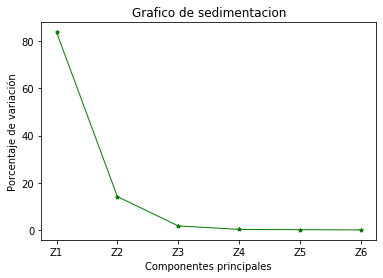

In [102]:
#Grafico de sedimentacion, permite representar el porcentaje de variacion explicado por cada componente o factor en las ordenadas
#y los componentes en orden decreciente en la abscisas con la finalidad de escoger los factores que retengan mas variacion
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(["Z1", "Z2", "Z3", "Z4","Z5","Z6"], y, color ="green", marker ='*', linewidth=1, markersize=4)
plt.title("Grafico de sedimentacion")
plt.xlabel("Componentes principales")
plt.ylabel("Porcentaje de variación")
plt.show()

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
DFT = scaler.fit_transform(df)
[DFT[:,0].mean(),DFT[:,1].mean(),DFT[:,0].std(),DFT[:,1].std()]

[-4.5315225494904345e-18, -1.291483926604774e-15, 1.0, 1.0]

In [108]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(DFT)
print(principalComponents)
principalDf = pd.DataFrame(data = principalComponents
              , columns = ['principal component 1', 'principal component 2'])
principalDf.describe()

[[ 0.04379983 -1.71479154]
 [ 2.30092683 -1.38420129]
 [ 1.25722367 -1.69026656]
 [ 2.42524339 -1.36058717]
 [ 0.38908626 -1.48362797]
 [-1.85028136 -1.18931271]
 [ 1.13889469 -1.11139723]
 [-0.36227517 -1.4760292 ]
 [-2.64545784 -1.02820632]
 [-0.1176941  -1.23678257]
 [-0.3095486  -1.14367696]
 [-0.2140288  -0.7331121 ]
 [-2.323949   -1.06172988]
 [-0.66996999 -0.87676606]
 [ 1.44854285 -0.45426097]
 [ 1.61125164 -0.47225724]
 [-0.51581414 -0.67407396]
 [ 1.70646761 -0.63789223]
 [ 1.81948319 -0.38657028]
 [-2.17406614 -0.32186542]
 [ 0.47774843 -0.17522473]
 [ 0.98777482 -0.22825801]
 [ 0.67317734 -0.14339495]
 [-1.59201415 -0.23527873]
 [ 3.74762718  0.23690408]
 [-2.14365695 -0.2081493 ]
 [ 1.33229256  0.12541442]
 [-1.74603532 -0.26201049]
 [-4.0447554  -0.05605395]
 [ 3.72197745  0.62239138]
 [-0.17809874  0.48022224]
 [-1.23826512  0.53420236]
 [-1.07346556  0.42149485]
 [ 0.67563827  1.05039718]
 [ 0.27904625  0.44380189]
 [-2.86808994  0.53363128]
 [ 4.22017995  1.20977634]
 

,principal component 1,principal component 2
count,4.900000e+01,4.900000e+01
mean,-9.063045e-18,8.609893e-17
std,1.924051e+00,1.037237e+00
min,-4.170130e+00,-1.714792e+00
25%,-1.675451e+00,-8.767661e-01
50%,4.379983e-02,-1.752247e-01
75%,1.332293e+00,1.050397e+00
max,4.220180e+00,1.799351e+00


In [109]:

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
per_var

array([60.4, 17.6])

In [110]:

COV=np.cov(X.T)
COV

array([[ 2.04166667e+02,  1.31041667e+01,  4.77083333e+00,
         7.22916667e-01, -1.45833333e-02, -2.29166667e-01],
       [ 1.31041667e+01,  1.33537415e+01,  1.36109694e+01,
         1.92206633e+00,  1.33061224e+00,  2.19221939e+00],
       [ 4.77083333e+00,  1.36109694e+01,  2.56828231e+01,
         2.71360544e+00,  2.19770408e+00,  2.65782313e+00],
       [ 7.22916667e-01,  1.92206633e+00,  2.71360544e+00,
         6.31632653e-01,  3.42266156e-01,  4.14647109e-01],
       [-1.45833333e-02,  1.33061224e+00,  2.19770408e+00,
         3.42266156e-01,  3.18418367e-01,  3.39370748e-01],
       [-2.29166667e-01,  2.19221939e+00,  2.65782313e+00,
         4.14647109e-01,  3.39370748e-01,  9.82823129e-01]])

In [111]:
np.linalg.eig(COV)

(array([2.05247945e+02, 3.46181611e+01, 4.27980835e+00, 6.00244118e-01,
        7.72836959e-02, 3.12663510e-01]),
 array([[ 9.96997674e-01,  6.40030394e-02, -4.15941494e-02,
          1.29269202e-02,  1.16297663e-03, -8.47625047e-04],
        [ 7.03984433e-02, -5.20072885e-01,  8.30661246e-01,
         -1.80347521e-01,  1.49059371e-02,  4.26934599e-02],
        [ 3.19048040e-02, -8.36551827e-01, -5.39264121e-01,
         -4.59252519e-02, -3.91202914e-02,  6.86862900e-02],
        [ 4.60819421e-03, -9.68564009e-02,  4.19773023e-02,
          2.32200125e-01, -3.55241597e-01, -8.99289730e-01],
        [ 7.36103335e-04, -7.57831457e-02, -5.65354177e-03,
          1.96594677e-01,  9.27798287e-01, -3.07839702e-01],
        [ 6.27033671e-05, -1.02394328e-01,  1.25187746e-01,
          9.34147832e-01, -1.06017969e-01,  2.99952403e-01]]))

In [112]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

In [113]:
plt.scatter(df[:,0],df[:,1], alpha=0.5)
L2=[2,0.3]
i=0
for length, vector in zip(pca.explained_variance_, pca.components_):
  print(vector)
  print(length)
  v = vector*L2[i]
  i=+1
  draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
#tener en cuenta

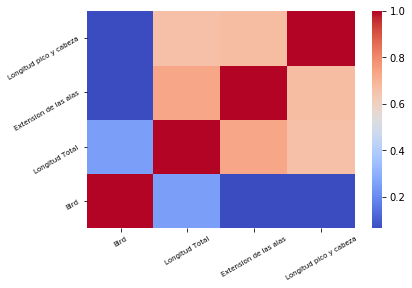

In [114]:
import seaborn as sns
fig, ax = plt.subplots()
s=sns.heatmap(df.iloc[:,0:4].corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
plt.show()


In [54]:

df.iloc[:,0:4].cov()

,Bird,Longitud Total,Extension de las alas,Longitud pico y cabeza
Bird,204.166667,13.104167,4.770833,0.722917
Longitud Total,13.104167,13.353741,13.610969,1.922066
Extension de las alas,4.770833,13.610969,25.682823,2.713605
Longitud pico y cabeza,0.722917,1.922066,2.713605,0.631633


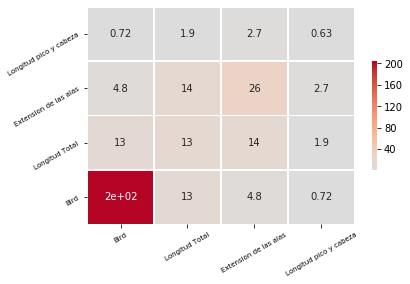

In [58]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig, ax = plt.subplots()
s=sns.heatmap(df.iloc[:,0:4].cov(),cmap='coolwarm', center=0,
             linewidths=.5, cbar_kws={"shrink": .5},annot=True) 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
plt.show()

In [60]:
np.linalg.eig(np.cov(X.T))

(array([2.05247945e+02, 3.46181611e+01, 4.27980835e+00, 6.00244118e-01,
        7.72836959e-02, 3.12663510e-01]),
 array([[ 9.96997674e-01,  6.40030394e-02, -4.15941494e-02,
          1.29269202e-02,  1.16297663e-03, -8.47625047e-04],
        [ 7.03984433e-02, -5.20072885e-01,  8.30661246e-01,
         -1.80347521e-01,  1.49059371e-02,  4.26934599e-02],
        [ 3.19048040e-02, -8.36551827e-01, -5.39264121e-01,
         -4.59252519e-02, -3.91202914e-02,  6.86862900e-02],
        [ 4.60819421e-03, -9.68564009e-02,  4.19773023e-02,
          2.32200125e-01, -3.55241597e-01, -8.99289730e-01],
        [ 7.36103335e-04, -7.57831457e-02, -5.65354177e-03,
          1.96594677e-01,  9.27798287e-01, -3.07839702e-01],
        [ 6.27033671e-05, -1.02394328e-01,  1.25187746e-01,
          9.34147832e-01, -1.06017969e-01,  2.99952403e-01]]))

In [66]:

from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4','principal component 5', 'principal component 6'])
principalDf.describe()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
count,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01
mean,-3.190192e-15,1.151007e-14,2.132081e-15,-1.515794e-15,-2.259530e-15,3.789486e-16
std,1.432648e+01,5.883720e+00,2.068770e+00,7.747542e-01,5.591632e-01,2.779995e-01
min,-2.394945e+01,-1.054690e+01,-3.757788e+00,-1.432862e+00,-1.406567e+00,-4.761750e-01
25%,-1.159769e+01,-3.823014e+00,-1.650569e+00,-6.517876e-01,-3.987946e-01,-1.723616e-01
50%,-7.248556e-01,8.841846e-02,-1.075438e-01,6.748921e-02,-9.105127e-03,-6.195631e-02
75%,1.159312e+01,4.216518e+00,1.512058e+00,6.320018e-01,3.765531e-01,1.938074e-01
max,2.456881e+01,1.377228e+01,4.583252e+00,2.236953e+00,1.875629e+00,6.742015e-01


In [67]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

KeyError: "None of [Index(['target'], dtype='object')] are in the [columns]"

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
features = ['Extension de las alas', 'Longitud pico y cabeza', 'Longitud del homero', 'Longitud de la quilla']
x = df.loc[:, features].values
x

array([[245. ,  31.6,  18.5,  20.5],
       [240. ,  30.4,  17.9,  19.6],
       [240. ,  31. ,  18.4,  20.6],
       [236. ,  30.9,  17.7,  20.2],
       [243. ,  31.5,  18.6,  20.3],
       [247. ,  32. ,  19. ,  20.9],
       [238. ,  30.9,  18.4,  20.2],
       [239. ,  32.8,  18.6,  21.2],
       [248. ,  32.7,  19.1,  21.1],
       [238. ,  31. ,  18.8,  22. ],
       [240. ,  31.3,  18.6,  22. ],
       [244. ,  31.1,  18.6,  20.5],
       [246. ,  32.3,  19.3,  21.8],
       [245. ,  32. ,  19.1,  20. ],
       [235. ,  31.5,  18.1,  19.8],
       [237. ,  30.9,  18. ,  20.3],
       [244. ,  31.4,  18.5,  21.6],
       [238. ,  30.5,  18.2,  20.9],
       [236. ,  30.3,  18.5,  20.1],
       [246. ,  32.5,  18.6,  21.9],
       [236. ,  31.5,  18. ,  21.5],
       [240. ,  31.4,  18. ,  20.7],
       [240. ,  31.5,  18.2,  20.6],
       [242. ,  32.6,  18.8,  21.7],
       [232. ,  30.3,  17.2,  19.8],
       [250. ,  31.7,  18.8,  22.5],
       [237. ,  31. ,  18.5,  20. ],
 

In [20]:
y = df.loc[:,['Extension de las alas']].values
y

array([[245],
       [240],
       [240],
       [236],
       [243],
       [247],
       [238],
       [239],
       [248],
       [238],
       [240],
       [244],
       [246],
       [245],
       [235],
       [237],
       [244],
       [238],
       [236],
       [246],
       [236],
       [240],
       [240],
       [242],
       [232],
       [250],
       [237],
       [245],
       [245],
       [231],
       [239],
       [243],
       [245],
       [247],
       [243],
       [252],
       [230],
       [242],
       [238],
       [249],
       [242],
       [237],
       [238],
       [245],
       [235],
       [247],
       [237],
       [245],
       [248]], dtype=int64)

In [23]:
x2 = StandardScaler(with_std=False).fit_transform(x)
#x2 = StandardScaler().fit_transform(x)
x2

array([[  3.67346939,   0.14081633,   0.03061224,  -0.32653061],
       [ -1.32653061,  -1.05918367,  -0.56938776,  -1.22653061],
       [ -1.32653061,  -0.45918367,  -0.06938776,  -0.22653061],
       [ -5.32653061,  -0.55918367,  -0.76938776,  -0.62653061],
       [  1.67346939,   0.04081633,   0.13061224,  -0.52653061],
       [  5.67346939,   0.54081633,   0.53061224,   0.07346939],
       [ -3.32653061,  -0.55918367,  -0.06938776,  -0.62653061],
       [ -2.32653061,   1.34081633,   0.13061224,   0.37346939],
       [  6.67346939,   1.24081633,   0.63061224,   0.27346939],
       [ -3.32653061,  -0.45918367,   0.33061224,   1.17346939],
       [ -1.32653061,  -0.15918367,   0.13061224,   1.17346939],
       [  2.67346939,  -0.35918367,   0.13061224,  -0.32653061],
       [  4.67346939,   0.84081633,   0.83061224,   0.97346939],
       [  3.67346939,   0.54081633,   0.63061224,  -0.82653061],
       [ -6.32653061,   0.04081633,  -0.36938776,  -1.02653061],
       [ -4.32653061,  -0

In [24]:
standardbase=pd.DataFrame(x2, columns=['Extension de las alas', 'Longitud pico y cabeza', 'Longitud del homero', 'Longitud de la quilla'])

In [25]:
standardbase.head()

,Extension de las alas,Longitud pico y cabeza,Longitud del homero,Longitud de la quilla
0,3.673469,0.140816,0.030612,-0.326531
1,-1.326531,-1.059184,-0.569388,-1.226531
2,-1.326531,-0.459184,-0.069388,-0.226531
3,-5.326531,-0.559184,-0.769388,-0.626531
4,1.673469,0.040816,0.130612,-0.526531


In [26]:
PromC1=df["Extension de las alas"].mean()
DevestC1=np.std(df["Extension de las alas"])
print(PromC1)
print(DevestC1)

241.3265306122449
5.015843287196676


In [31]:
estandarización=lambda x:(x-PromC1)


In [33]:
df["Extension de las alas"].apply(estandarización)

0      3.673469
1     -1.326531
2     -1.326531
3     -5.326531
4      1.673469
5      5.673469
6     -3.326531
7     -2.326531
8      6.673469
9     -3.326531
10    -1.326531
11     2.673469
12     4.673469
13     3.673469
14    -6.326531
15    -4.326531
16     2.673469
17    -3.326531
18    -5.326531
19     4.673469
20    -5.326531
21    -1.326531
22    -1.326531
23     0.673469
24    -9.326531
25     8.673469
26    -4.326531
27     3.673469
28     3.673469
29   -10.326531
30    -2.326531
31     1.673469
32     3.673469
33     5.673469
34     1.673469
35    10.673469
36   -11.326531
37     0.673469
38    -3.326531
39     7.673469
40     0.673469
41    -4.326531
42    -3.326531
43     3.673469
44    -6.326531
45     5.673469
46    -4.326531
47     3.673469
48     6.673469
Name: Extension de las alas, dtype: float64

In [34]:
x2

array([[  3.67346939,   0.14081633,   0.03061224,  -0.32653061],
       [ -1.32653061,  -1.05918367,  -0.56938776,  -1.22653061],
       [ -1.32653061,  -0.45918367,  -0.06938776,  -0.22653061],
       [ -5.32653061,  -0.55918367,  -0.76938776,  -0.62653061],
       [  1.67346939,   0.04081633,   0.13061224,  -0.52653061],
       [  5.67346939,   0.54081633,   0.53061224,   0.07346939],
       [ -3.32653061,  -0.55918367,  -0.06938776,  -0.62653061],
       [ -2.32653061,   1.34081633,   0.13061224,   0.37346939],
       [  6.67346939,   1.24081633,   0.63061224,   0.27346939],
       [ -3.32653061,  -0.45918367,   0.33061224,   1.17346939],
       [ -1.32653061,  -0.15918367,   0.13061224,   1.17346939],
       [  2.67346939,  -0.35918367,   0.13061224,  -0.32653061],
       [  4.67346939,   0.84081633,   0.83061224,   0.97346939],
       [  3.67346939,   0.54081633,   0.63061224,  -0.82653061],
       [ -6.32653061,   0.04081633,  -0.36938776,  -1.02653061],
       [ -4.32653061,  -0

In [35]:
np.dot(np.transpose(x2),(x2))*(1/49)

array([[25.15868388,  2.65822574,  2.15285298,  2.60358184],
       [ 2.65822574,  0.61874219,  0.33528113,  0.40618492],
       [ 2.15285298,  0.33528113,  0.31192003,  0.33244481],
       [ 2.60358184,  0.40618492,  0.33244481,  0.96276551]])

In [36]:
np.cov(np.transpose(x))

array([[25.68282313,  2.71360544,  2.19770408,  2.65782313],
       [ 2.71360544,  0.63163265,  0.34226616,  0.41464711],
       [ 2.19770408,  0.34226616,  0.31841837,  0.33937075],
       [ 2.65782313,  0.41464711,  0.33937075,  0.98282313]])

In [39]:
COV=np.cov(np.transpose(x))


array([[25.68282313,  2.71360544,  2.19770408,  2.65782313],
       [ 2.71360544,  0.63163265,  0.34226616,  0.41464711],
       [ 2.19770408,  0.34226616,  0.31841837,  0.33937075],
       [ 2.65782313,  0.41464711,  0.33937075,  0.98282313]])

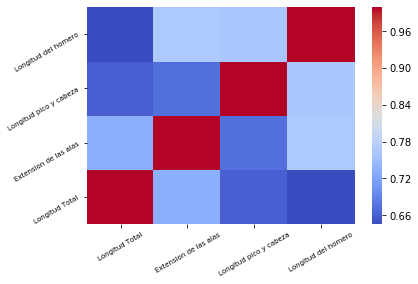

In [48]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig, ax = plt.subplots()
s=sns.heatmap(df.iloc[:,1:5].corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
plt.show()

In [46]:
df.iloc[:,0:5].cov()

,Bird,Longitud Total,Extension de las alas,Longitud pico y cabeza,Longitud del homero
Bird,204.166667,13.104167,4.770833,0.722917,-0.014583
Longitud Total,13.104167,13.353741,13.610969,1.922066,1.330612
Extension de las alas,4.770833,13.610969,25.682823,2.713605,2.197704
Longitud pico y cabeza,0.722917,1.922066,2.713605,0.631633,0.342266
Longitud del homero,-0.014583,1.330612,2.197704,0.342266,0.318418


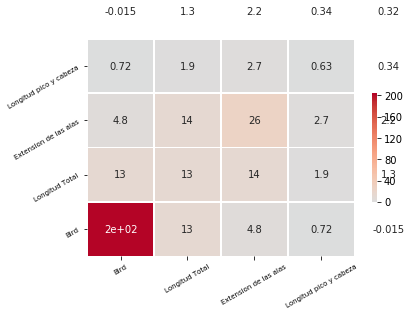

In [49]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig, ax = plt.subplots()
s=sns.heatmap(df.iloc[:,0:5].cov(),cmap='coolwarm', center=0,
             linewidths=.5, cbar_kws={"shrink": .5},annot=True) 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
plt.show()

In [50]:
np.linalg.eig(COV)

(array([26.45190479,  0.76540486,  0.31938542,  0.07900221]),
 array([[-0.98498667, -0.14965121, -0.07877973, -0.03463431],
        [-0.10634954,  0.31507474,  0.88012669, -0.33881366],
        [-0.08559773,  0.20054217,  0.27799797,  0.93550681],
        [-0.10566016,  0.91548635, -0.37668009, -0.09398285]]))

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

In [52]:
principalDf.describe()

,principal component 1,principal component 2,principal component 3,principal component 4
count,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01
mean,1.056751e-14,-1.907771e-15,-2.166068e-15,4.061377e-16
std,5.143142e+00,8.748742e-01,5.651420e-01,2.810733e-01
min,-1.075921e+01,-1.970137e+00,-1.259003e+00,-4.932043e-01
25%,-3.760524e+00,-3.634318e-01,-4.506738e-01,-1.861714e-01
50%,-5.356942e-01,5.715301e-02,1.337734e-02,-5.816339e-02
75%,3.514184e+00,5.049736e-01,3.537782e-01,1.812777e-01
max,1.160448e+01,2.771468e+00,1.823805e+00,6.741474e-01


In [54]:

finalDf = pd.concat([principalDf, df[['Extension de las alas']]], axis = 1)

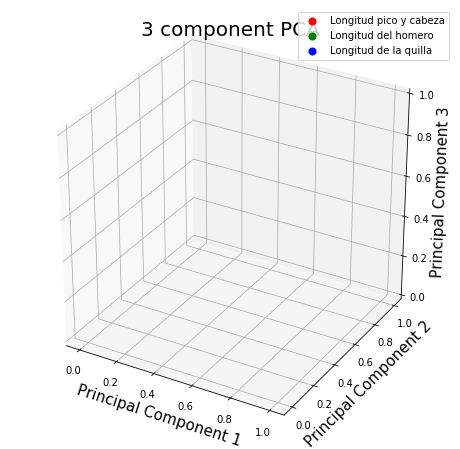

In [56]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_zlabel('Principal Component 4', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['Longitud pico y cabeza', 'Longitud del homero', 'Longitud de la quilla']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Extension de las alas'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , finalDf.loc[indicesToKeep, 'principal component 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [57]:

pca.explained_variance_ratio_

array([0.95785757, 0.0277163 , 0.01156536, 0.00286077])

In [72]:
m = np.array(x)
U, S, VT = np.linalg.svd(m)
print('Getting SVD outputs:-\n')
print('U:\n', U, '\n')
print('S:\n', S, '\n')
print('VT:\n', VT, '\n')

Getting SVD outputs:-

U:
 [[-1.44932204e-01  1.22814642e-01  3.29849050e-02 ... -9.98649537e-02
  -1.86665654e-01 -1.74764276e-01]
 [-1.41899181e-01  2.27902738e-01  1.27098763e-01 ... -4.22475443e-02
   9.79045987e-02 -3.23458893e-02]
 [-1.42015669e-01  3.01106059e-02  5.14009915e-02 ... -2.63775470e-01
   1.69774821e-01  5.70341256e-02]
 ...
 [-1.40261293e-01  7.20550789e-03  3.24616436e-02 ...  9.22443934e-01
   2.94088525e-02 -5.72474028e-03]
 [-1.45029341e-01 -1.20810617e-02 -1.14785594e-01 ...  3.60066094e-02
   9.28302671e-01 -3.42595071e-02]
 [-1.46740942e-01  8.40041150e-02 -2.77914513e-02 ...  5.77787264e-04
  -3.59166732e-02  9.69237517e-01]] 

S:
 [1715.05604694    6.08213042    4.01036963    2.01506633] 

VT:
 [[-0.98518664 -0.12841889 -0.07540345 -0.08503052]
 [ 0.13387806 -0.2958918  -0.20375612 -0.92358441]
 [ 0.10473882 -0.89585092 -0.24430266  0.35608584]
 [-0.02266557 -0.30562685  0.94504707 -0.11386189]] 



In [17]:
x2 = StandardScaler(with_std=False).fit_transform(x)
#x2 = StandardScaler().fit_transform(x)
x2

array([[  3.67346939,   0.14081633,   0.03061224,  -0.32653061],
       [ -1.32653061,  -1.05918367,  -0.56938776,  -1.22653061],
       [ -1.32653061,  -0.45918367,  -0.06938776,  -0.22653061],
       [ -5.32653061,  -0.55918367,  -0.76938776,  -0.62653061],
       [  1.67346939,   0.04081633,   0.13061224,  -0.52653061],
       [  5.67346939,   0.54081633,   0.53061224,   0.07346939],
       [ -3.32653061,  -0.55918367,  -0.06938776,  -0.62653061],
       [ -2.32653061,   1.34081633,   0.13061224,   0.37346939],
       [  6.67346939,   1.24081633,   0.63061224,   0.27346939],
       [ -3.32653061,  -0.45918367,   0.33061224,   1.17346939],
       [ -1.32653061,  -0.15918367,   0.13061224,   1.17346939],
       [  2.67346939,  -0.35918367,   0.13061224,  -0.32653061],
       [  4.67346939,   0.84081633,   0.83061224,   0.97346939],
       [  3.67346939,   0.54081633,   0.63061224,  -0.82653061],
       [ -6.32653061,   0.04081633,  -0.36938776,  -1.02653061],
       [ -4.32653061,  -0

In [19]:
standardbase=pd.DataFrame(x2, columns=['Extension de las alas', 'Longitud pico y cabeza', 'Longitud del homero', 'Longitud de la quilla'])
standardbase.head()

,Extension de las alas,Longitud pico y cabeza,Longitud del homero,Longitud de la quilla
0,3.673469,0.140816,0.030612,-0.326531
1,-1.326531,-1.059184,-0.569388,-1.226531
2,-1.326531,-0.459184,-0.069388,-0.226531
3,-5.326531,-0.559184,-0.769388,-0.626531
4,1.673469,0.040816,0.130612,-0.526531


In [21]:
PromC1 = df["Extension de las alas"].mean()
DevestC1=np.std(df["Longitud pico y cabeza"])
print(PromC1)
print(DevestC1)

241.3265306122449
0.7866016722292501


In [22]:
estandarizacion=lambda x:(x-PromC1)

In [23]:
df["Extension de las alas"].apply(estandarizacion)

0      3.673469
1     -1.326531
2     -1.326531
3     -5.326531
4      1.673469
5      5.673469
6     -3.326531
7     -2.326531
8      6.673469
9     -3.326531
10    -1.326531
11     2.673469
12     4.673469
13     3.673469
14    -6.326531
15    -4.326531
16     2.673469
17    -3.326531
18    -5.326531
19     4.673469
20    -5.326531
21    -1.326531
22    -1.326531
23     0.673469
24    -9.326531
25     8.673469
26    -4.326531
27     3.673469
28     3.673469
29   -10.326531
30    -2.326531
31     1.673469
32     3.673469
33     5.673469
34     1.673469
35    10.673469
36   -11.326531
37     0.673469
38    -3.326531
39     7.673469
40     0.673469
41    -4.326531
42    -3.326531
43     3.673469
44    -6.326531
45     5.673469
46    -4.326531
47     3.673469
48     6.673469
Name: Extension de las alas, dtype: float64

In [24]:
x2

array([[  3.67346939,   0.14081633,   0.03061224,  -0.32653061],
       [ -1.32653061,  -1.05918367,  -0.56938776,  -1.22653061],
       [ -1.32653061,  -0.45918367,  -0.06938776,  -0.22653061],
       [ -5.32653061,  -0.55918367,  -0.76938776,  -0.62653061],
       [  1.67346939,   0.04081633,   0.13061224,  -0.52653061],
       [  5.67346939,   0.54081633,   0.53061224,   0.07346939],
       [ -3.32653061,  -0.55918367,  -0.06938776,  -0.62653061],
       [ -2.32653061,   1.34081633,   0.13061224,   0.37346939],
       [  6.67346939,   1.24081633,   0.63061224,   0.27346939],
       [ -3.32653061,  -0.45918367,   0.33061224,   1.17346939],
       [ -1.32653061,  -0.15918367,   0.13061224,   1.17346939],
       [  2.67346939,  -0.35918367,   0.13061224,  -0.32653061],
       [  4.67346939,   0.84081633,   0.83061224,   0.97346939],
       [  3.67346939,   0.54081633,   0.63061224,  -0.82653061],
       [ -6.32653061,   0.04081633,  -0.36938776,  -1.02653061],
       [ -4.32653061,  -0

In [26]:
np.dot(np.transpose(x2),(x2))*(1/49)

array([[25.15868388,  2.65822574,  2.15285298,  2.60358184],
       [ 2.65822574,  0.61874219,  0.33528113,  0.40618492],
       [ 2.15285298,  0.33528113,  0.31192003,  0.33244481],
       [ 2.60358184,  0.40618492,  0.33244481,  0.96276551]])

In [27]:
np.cov(np.transpose(x))

array([[25.68282313,  2.71360544,  2.19770408,  2.65782313],
       [ 2.71360544,  0.63163265,  0.34226616,  0.41464711],
       [ 2.19770408,  0.34226616,  0.31841837,  0.33937075],
       [ 2.65782313,  0.41464711,  0.33937075,  0.98282313]])

In [29]:
COV=np.cov(np.transpose(x))
COV

array([[25.68282313,  2.71360544,  2.19770408,  2.65782313],
       [ 2.71360544,  0.63163265,  0.34226616,  0.41464711],
       [ 2.19770408,  0.34226616,  0.31841837,  0.33937075],
       [ 2.65782313,  0.41464711,  0.33937075,  0.98282313]])

In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns

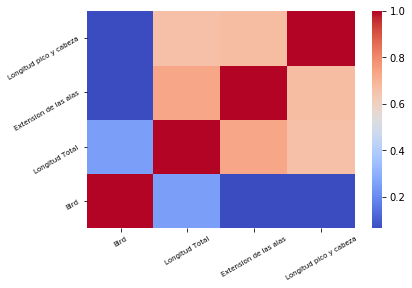

In [31]:
fig, ax = plt.subplots()
s=sns.heatmap(df.iloc[:,0:4].corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
plt.show()

In [35]:
df.iloc[:,1:5].cov()

,Longitud Total,Extension de las alas,Longitud pico y cabeza,Longitud del homero
Longitud Total,13.353741,13.610969,1.922066,1.330612
Extension de las alas,13.610969,25.682823,2.713605,2.197704
Longitud pico y cabeza,1.922066,2.713605,0.631633,0.342266
Longitud del homero,1.330612,2.197704,0.342266,0.318418


In [36]:
import matplotlib.pyplot as plt 
import seaborn as sns

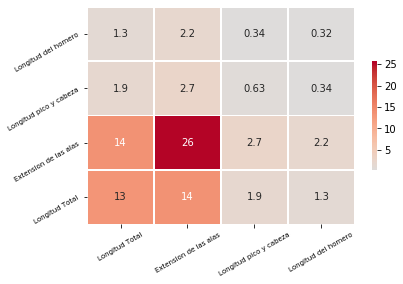

In [39]:
fig, ax = plt.subplots()
s=sns.heatmap(df.iloc[:,1:5].cov(),cmap='coolwarm', center=0,
             linewidths=.5, cbar_kws={"shrink": .5},annot=True) 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
plt.show()


In [40]:
#Calculo de componentes
np.linalg.eig(COV)

(array([26.45190479,  0.76540486,  0.31938542,  0.07900221]),
 array([[-0.98498667, -0.14965121, -0.07877973, -0.03463431],
        [-0.10634954,  0.31507474,  0.88012669, -0.33881366],
        [-0.08559773,  0.20054217,  0.27799797,  0.93550681],
        [-0.10566016,  0.91548635, -0.37668009, -0.09398285]]))

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

In [44]:
principalDf.describe()

,principal component 1,principal component 2,principal component 3,principal component 4
count,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01
mean,1.056751e-14,-1.907771e-15,-2.166068e-15,4.061377e-16
std,5.143142e+00,8.748742e-01,5.651420e-01,2.810733e-01
min,-1.075921e+01,-1.970137e+00,-1.259003e+00,-4.932043e-01
25%,-3.760524e+00,-3.634318e-01,-4.506738e-01,-1.861714e-01
50%,-5.356942e-01,5.715301e-02,1.337734e-02,-5.816339e-02
75%,3.514184e+00,5.049736e-01,3.537782e-01,1.812777e-01
max,1.160448e+01,2.771468e+00,1.823805e+00,6.741474e-01


In [6]:
import sklearn


In [7]:
import mglearn as mg
from sklearn.datasets import load_breast_cancer


In [8]:
import matplotlib.pyplot as plt


In [9]:
from sklearn.decomposition import PCA
%matplotlib inline

In [10]:
import mglearn as mg

In [4]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582711 sha256=35443b5a43e1a85f56b1d817fd5e6fea91e57e21b5f825f4026be8a095dc2277
  Stored in directory: C:\Users\rrruiz\AppData\Local\pip\Cache\wheels\74\cf\8d\04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [55]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [56]:
transformacion = pca.transform(df)

In [57]:
print(df.shape)

(49, 6)


In [58]:
print(transformacion.shape)

(49, 2)


In [62]:
df.describe()

,Bird,Longitud Total,Extension de las alas,Longitud pico y cabeza,Longitud del homero,Longitud de la quilla
count,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.00000,157.979592,241.326531,31.459184,18.469388,20.826531
std,14.28869,3.654277,5.067822,0.794753,0.564286,0.991374
min,1.00000,152.000000,230.000000,30.100000,17.200000,18.600000
25%,13.00000,155.000000,238.000000,30.900000,18.100000,20.200000
50%,25.00000,158.000000,242.000000,31.500000,18.500000,20.700000
75%,37.00000,161.000000,245.000000,32.000000,18.800000,21.500000
max,49.00000,165.000000,252.000000,33.400000,19.800000,23.100000


In [64]:
df = df.dropna()
df.head(9)

,Bird,Longitud Total,Extension de las alas,Longitud pico y cabeza,Longitud del homero,Longitud de la quilla
0,1,156,245,31.6,18.5,20.5
1,2,154,240,30.4,17.9,19.6
2,3,153,240,31.0,18.4,20.6
3,4,153,236,30.9,17.7,20.2
4,5,155,243,31.5,18.6,20.3
5,6,163,247,32.0,19.0,20.9
6,7,157,238,30.9,18.4,20.2
7,8,155,239,32.8,18.6,21.2
8,9,164,248,32.7,19.1,21.1


In [11]:
target_df =df['Longitud Total']

NameError: name 'df' is not defined

In [68]:
df.Longitud_total


AttributeError: 'DataFrame' object has no attribute 'Longitud_total'